# DETECTING PRESENCE OF HUNTINGTON'S DISEASE USING MACHINE LEARNING MODELS ON GENE EXPRESSION DATA ##


## Data Preprocessing #

Importing libraries

In [ ]:
#Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import f1_score
from sklearn import svm
from sklearn import tree
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

Loading the datasets

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df

,Age,sex,SERPINA3,ACTN2,ADH1B,ADORA3,ADSS,AEBP1,ALDH1A1,ANK3,...,UBE2NL,C1QL3,LOC402573,C10orf105,FLJ32679,FAM110C,hCG_1776018,MT1P2,VSIG8///C1orf204,HD
0,56,0,1.126439,0.906488,1.017647,1.057529,0.873185,0.706814,1.151048,0.877750,...,0.912315,0.840621,0.892332,1.120317,0.939715,1.056337,0.779235,0.971068,1.002719,0
1,64,1,0.423748,1.051068,0.725849,0.816707,1.033929,0.692988,1.093235,1.045073,...,1.080896,1.157441,0.871195,0.743823,1.119062,1.148903,0.643764,0.859250,1.067670,0
2,95,0,0.683650,0.964395,0.822266,1.138490,1.020041,0.794465,1.061820,1.036300,...,1.007549,0.904321,0.868228,1.033354,1.048135,0.930734,0.869833,0.910409,0.962064,0
3,59,1,0.479261,0.973672,0.829339,0.836592,0.928945,0.871121,1.094445,1.005824,...,0.910860,0.880755,0.988173,0.890390,1.020956,1.027354,0.632799,0.925269,1.016668,0
4,53,1,0.471499,1.099725,0.816296,0.915491,1.077495,0.920008,1.088914,1.047452,...,1.072601,1.071938,0.869270,0.838847,1.150226,1.055640,0.768853,0.864785,1.033935,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,64,1,0.569699,0.864537,0.987946,0.960145,0.820742,1.195820,0.842063,0.856327,...,0.880869,0.829895,0.846159,0.808321,0.903127,1.086288,0.758910,1.337928,0.890693,1
310,57,0,1.441082,0.949145,1.418889,1.082853,0.965401,0.903753,1.057604,0.840926,...,1.087488,1.092021,1.220947,1.332375,0.855002,2.477575,0.940239,1.180993,0.924023,1
311,28,1,1.362533,0.999677,1.444980,1.109395,0.849096,1.382232,1.011152,0.877266,...,1.009122,1.075494,1.152686,0.836826,0.864537,1.152547,1.106497,1.010521,0.965802,1
312,38,1,0.641381,0.869345,1.201678,0.977801,0.870551,1.111879,0.953166,0.901086,...,0.905634,0.865137,1.107265,0.890076,0.911301,2.447513,0.657927,0.896888,0.911933,1


Separating training data and label data

In [ ]:
X = df.drop("HD",axis=1)
y = df['HD']

Feature Normalization

In [ ]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

Feature Scaling

In [ ]:
# Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_norm)

Combining treaining data and labels

In [ ]:
df_norm_scaled = pd.concat([pd.DataFrame(X_scaled, columns=X.columns), y], axis=1)

In [ ]:
df_norm_scaled

,Age,sex,SERPINA3,ACTN2,ADH1B,ADORA3,ADSS,AEBP1,ALDH1A1,ANK3,...,UBE2NL,C1QL3,LOC402573,C10orf105,FLJ32679,FAM110C,hCG_1776018,MT1P2,VSIG8///C1orf204,HD
0,0.431818,0.0,0.520008,0.554501,0.432249,0.424350,0.522139,0.101350,0.841631,0.534100,...,0.393430,0.294458,0.139648,0.370479,0.569505,0.138467,0.170794,0.299098,0.720925,0
1,0.522727,1.0,0.018972,0.786530,0.190349,0.216475,0.774017,0.087744,0.757540,0.799707,...,0.644149,0.681496,0.119164,0.038978,0.819601,0.192735,0.073336,0.169008,0.846032,0
2,0.875000,0.0,0.204289,0.647432,0.270278,0.494234,0.752254,0.187605,0.711847,0.785782,...,0.535066,0.372277,0.116289,0.293909,0.720695,0.064831,0.235970,0.228527,0.642615,0
3,0.465909,1.0,0.058554,0.662320,0.276142,0.233640,0.609512,0.263040,0.759301,0.737404,...,0.391267,0.343488,0.232523,0.168029,0.682793,0.121476,0.065448,0.245815,0.747794,0
4,0.397727,1.0,0.053020,0.864616,0.265330,0.301744,0.842282,0.311149,0.751255,0.803483,...,0.631813,0.577043,0.117299,0.122647,0.863058,0.138059,0.163325,0.175447,0.781052,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,0.522727,1.0,0.123039,0.487176,0.407627,0.340289,0.439963,0.582568,0.392206,0.500093,...,0.346664,0.281355,0.094902,0.095768,0.518483,0.156027,0.156172,0.725905,0.505140,1
310,0.443182,0.0,0.744356,0.622959,0.764878,0.446210,0.666636,0.295153,0.705715,0.475644,...,0.653953,0.601576,0.458095,0.557195,0.451375,0.971682,0.286621,0.543326,0.569340,1
311,0.113636,1.0,0.688349,0.704055,0.786507,0.469121,0.484393,0.766012,0.638150,0.533331,...,0.537404,0.581387,0.391947,0.120867,0.464671,0.194871,0.406226,0.344998,0.649816,1
312,0.227273,1.0,0.174150,0.494891,0.584810,0.355530,0.518011,0.499964,0.553808,0.571143,...,0.383495,0.324408,0.347930,0.167753,0.529883,0.954058,0.083526,0.212797,0.546053,1


Saving normalized and scaled data

In [ ]:
df_norm_scaled.to_csv('normalized_scaled_dataset.csv', index=False)

## Dimensionality Reduction using Principal Component Analysis

Loading normalized and scaled data

In [ ]:
data_pca= pd.read_csv('normalized_scaled_dataset.csv')

In [ ]:
data_pca

,Age,sex,SERPINA3,ACTN2,ADH1B,ADORA3,ADSS,AEBP1,ALDH1A1,ANK3,...,UBE2NL,C1QL3,LOC402573,C10orf105,FLJ32679,FAM110C,hCG_1776018,MT1P2,VSIG8///C1orf204,HD
0,0.431818,0.0,0.520008,0.554501,0.432249,0.424350,0.522139,0.101350,0.841631,0.534100,...,0.393430,0.294458,0.139648,0.370479,0.569505,0.138467,0.170794,0.299098,0.720925,0
1,0.522727,1.0,0.018972,0.786530,0.190349,0.216475,0.774017,0.087744,0.757540,0.799707,...,0.644149,0.681496,0.119164,0.038978,0.819601,0.192735,0.073336,0.169008,0.846032,0
2,0.875000,0.0,0.204289,0.647432,0.270278,0.494234,0.752254,0.187605,0.711847,0.785782,...,0.535066,0.372277,0.116289,0.293909,0.720695,0.064831,0.235970,0.228527,0.642615,0
3,0.465909,1.0,0.058554,0.662320,0.276142,0.233640,0.609512,0.263040,0.759301,0.737404,...,0.391267,0.343488,0.232523,0.168029,0.682793,0.121476,0.065448,0.245815,0.747794,0
4,0.397727,1.0,0.053020,0.864616,0.265330,0.301744,0.842282,0.311149,0.751255,0.803483,...,0.631813,0.577043,0.117299,0.122647,0.863058,0.138059,0.163325,0.175447,0.781052,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,0.522727,1.0,0.123039,0.487176,0.407627,0.340289,0.439963,0.582568,0.392206,0.500093,...,0.346664,0.281355,0.094902,0.095768,0.518483,0.156027,0.156172,0.725905,0.505140,1
310,0.443182,0.0,0.744356,0.622959,0.764878,0.446210,0.666636,0.295153,0.705715,0.475644,...,0.653953,0.601576,0.458095,0.557195,0.451375,0.971682,0.286621,0.543326,0.569340,1
311,0.113636,1.0,0.688349,0.704055,0.786507,0.469121,0.484393,0.766012,0.638150,0.533331,...,0.537404,0.581387,0.391947,0.120867,0.464671,0.194871,0.406226,0.344998,0.649816,1
312,0.227273,1.0,0.174150,0.494891,0.584810,0.355530,0.518011,0.499964,0.553808,0.571143,...,0.383495,0.324408,0.347930,0.167753,0.529883,0.954058,0.083526,0.212797,0.546053,1


Seperating observation data

In [ ]:
X_pca=data_pca.drop('HD',axis=1)

In [ ]:
X_pca

,Age,sex,SERPINA3,ACTN2,ADH1B,ADORA3,ADSS,AEBP1,ALDH1A1,ANK3,...,MALAT1,UBE2NL,C1QL3,LOC402573,C10orf105,FLJ32679,FAM110C,hCG_1776018,MT1P2,VSIG8///C1orf204
0,0.431818,0.0,0.520008,0.554501,0.432249,0.424350,0.522139,0.101350,0.841631,0.534100,...,0.334633,0.393430,0.294458,0.139648,0.370479,0.569505,0.138467,0.170794,0.299098,0.720925
1,0.522727,1.0,0.018972,0.786530,0.190349,0.216475,0.774017,0.087744,0.757540,0.799707,...,0.659433,0.644149,0.681496,0.119164,0.038978,0.819601,0.192735,0.073336,0.169008,0.846032
2,0.875000,0.0,0.204289,0.647432,0.270278,0.494234,0.752254,0.187605,0.711847,0.785782,...,0.389603,0.535066,0.372277,0.116289,0.293909,0.720695,0.064831,0.235970,0.228527,0.642615
3,0.465909,1.0,0.058554,0.662320,0.276142,0.233640,0.609512,0.263040,0.759301,0.737404,...,0.175923,0.391267,0.343488,0.232523,0.168029,0.682793,0.121476,0.065448,0.245815,0.747794
4,0.397727,1.0,0.053020,0.864616,0.265330,0.301744,0.842282,0.311149,0.751255,0.803483,...,0.565352,0.631813,0.577043,0.117299,0.122647,0.863058,0.138059,0.163325,0.175447,0.781052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,0.522727,1.0,0.123039,0.487176,0.407627,0.340289,0.439963,0.582568,0.392206,0.500093,...,0.197872,0.346664,0.281355,0.094902,0.095768,0.518483,0.156027,0.156172,0.725905,0.505140
310,0.443182,0.0,0.744356,0.622959,0.764878,0.446210,0.666636,0.295153,0.705715,0.475644,...,0.144692,0.653953,0.601576,0.458095,0.557195,0.451375,0.971682,0.286621,0.543326,0.569340
311,0.113636,1.0,0.688349,0.704055,0.786507,0.469121,0.484393,0.766012,0.638150,0.533331,...,0.294481,0.537404,0.581387,0.391947,0.120867,0.464671,0.194871,0.406226,0.344998,0.649816
312,0.227273,1.0,0.174150,0.494891,0.584810,0.355530,0.518011,0.499964,0.553808,0.571143,...,0.856829,0.383495,0.324408,0.347930,0.167753,0.529883,0.954058,0.083526,0.212797,0.546053


Implementing PCA with 10 principle components

In [67]:
# Create a PCA object with the desired number of components
n_components = 10 
headers=X_pca.columns
pca = PCA(n_components=n_components)
pca.fit(X_pca)
principal = pca.transform(X_pca)
X_pca_df=pd.DataFrame(X_pca)
combined_data=pd.concat([X_pca_df,y],axis=1)


In [ ]:
combined_data

,0,1,2,3,4,5,6,7,8,9,HD
0,-3.650061,1.058977,1.665008,2.022155,0.326441,-0.852544,-0.326615,0.372957,-0.115801,-1.011011,0
1,4.343316,-4.730846,-0.001265,-0.388034,-0.502717,-0.095449,0.203031,0.069281,-0.088397,0.053772,0
2,35.328083,-1.632462,0.473045,1.993913,0.884726,0.158324,-0.525776,-0.132951,0.199750,0.203287,0
3,-0.625264,-2.335621,-0.707214,0.026988,-0.594395,-0.794103,0.795359,0.174553,0.437521,-0.254282,0
4,-6.657674,-4.204636,0.668352,-0.195770,-0.418938,-0.111455,-0.162959,0.555061,0.154897,-0.162395,0
...,...,...,...,...,...,...,...,...,...,...,...
309,4.298154,2.219223,0.953163,-1.075064,-0.630145,0.562506,-0.835222,2.014196,0.037298,0.190165,1
310,-2.733517,2.307036,2.491786,2.013981,-0.155667,1.372997,0.466923,0.068556,-0.209818,0.920327,1
311,-31.746938,2.928341,4.176775,-0.030051,-1.861154,1.177374,-0.199749,0.753821,0.585548,0.840784,1
312,-21.668701,1.954395,1.006882,-0.234822,-0.504753,1.123840,2.590501,2.593583,-0.408011,0.880674,1


## Machine Learning Models implementation

### Random Forest Classification

In [ ]:
X = combined_data.drop('HD', axis=1) 
y = combined_data['HD']

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
309    1
310    1
311    1
312    1
313    1
Name: HD, Length: 314, dtype: int64

Splitting data into training and test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf = RandomForestClassifier(n_estimators=10, random_state=42)
clf.fit(X_train,y_train)
ypred_rf=clf.predict(X_test)

Text(50.722222222222214, 0.5, 'True labels')

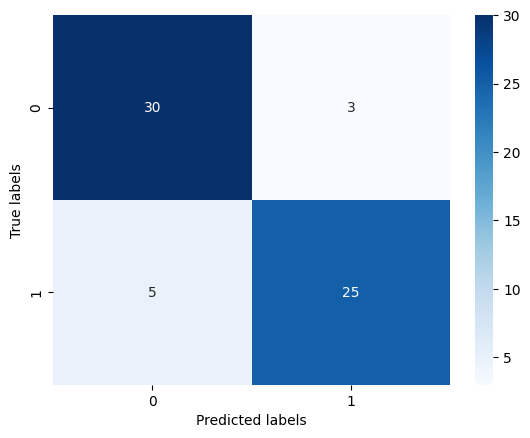

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Generate the confusion matrix
cm_rf = confusion_matrix(ypred_rf,y_test)

sns.heatmap(cm_rf, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

### SVM Classification

In [ ]:
s = svm.LinearSVC(max_iter=100000,random_state=42)
s.fit(X_train, y_train)
ypred_s=s.predict(X_test)

Text(50.722222222222214, 0.5, 'True labels')

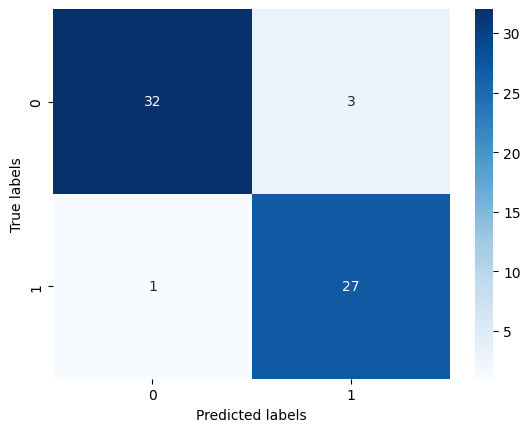

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Generate the confusion matrix
cm_s = confusion_matrix(y_test, ypred_s)

sns.heatmap(cm_s, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

### XGboost Classification

In [ ]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, min_child_weight=1, gamma=0, subsample=1, colsample_bytree=1, objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
xgb.fit(X_train, y_train)
ypred_xg = xgb.predict(X_test)

Text(50.722222222222214, 0.5, 'True labels')

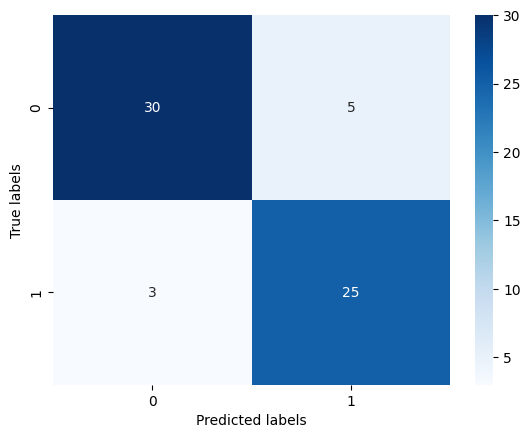

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Generate the confusion matrix
cm_xg = confusion_matrix(y_test, ypred_xg)

sns.heatmap(cm_xg, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

### Testing F1 score between Random Forest and SVM Classification

In [ ]:
print('Random forest', f1_score(y_test, clf.predict(X_test)))
print('SVM', f1_score(y_test, s.predict(X_test)))
print('XGBoost', f1_score(y_test, xgb.predict(X_test)))

Random forest 0.8620689655172413
SVM 0.9310344827586207
XGBoost 0.8620689655172413


### Training F1 score between Random Forest and SVM Classification

In [ ]:
print('Random forest', f1_score(clf.predict(X_train), y_train))
print('SVM', f1_score(y_train, s.predict(X_train)))
print('XGBoost', f1_score(xgb.predict(X_train), y_train))

Random forest 0.9961089494163424
SVM 0.9429657794676807
XGBoost 1.0


## Kfold Cross Validation

XGBoost

In [ ]:
# Define the number of folds
k = 10

# Create a KFold object with k folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Create an instance of the linear regression model
model = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, min_child_weight=1, gamma=0, subsample=1, colsample_bytree=1, objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

# Create empty lists to store the training and test scores
train_scores = []
test_scores = []

# Loop through each fold
for train_index, test_index in kf.split(X):
    # Split the data into training and test sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Calculate the training and test scores for this fold
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    # Append the scores to the respective lists
    train_scores.append(train_score)
    test_scores.append(test_score)

# Print the average training and test scores across all folds
print(f"Average training score: {np.mean(train_scores):.2f}")
print(f"Average test score: {np.mean(test_scores):.2f}")

Average training score: 1.00
Average test score: 0.91


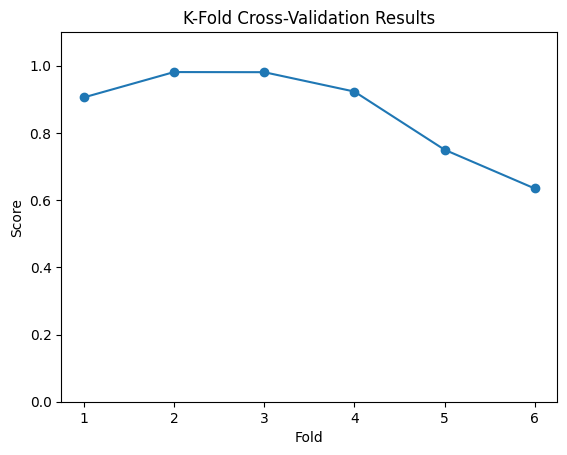

In [ ]:
# Define the model
xg = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, min_child_weight=1, gamma=0, subsample=1, colsample_bytree=1, objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

# Perform k-fold cross-validation
scores = cross_val_score(xg, X, y, cv=6)

# Plot the results
plt.plot(range(1, 7), scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.ylim([0, 1.1])
plt.title('K-Fold Cross-Validation Results')
plt.show()

Random Forest

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

# Defining number of folds
k = 10

# Creating KFold object with k folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Create an instance of the random forest model
rf=RandomForestClassifier(n_estimators=10, random_state=42)

train_scores = []
test_scores = []

for train_index, test_index in kf.split(X):
    # Splitting data into training and test sets for each fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit model on the training data
    rf.fit(X_train, y_train)
    
    # Calculate the training and test scores for this fold
    train_score = rf.score(X_train, y_train)
    test_score = rf.score(X_test, y_test)
    
    # Append the scores to the respective lists
    train_scores.append(train_score)
    test_scores.append(test_score)

# Print the average training and test scores across all folds
print(f"Average training score: {np.mean(train_scores):.2f}")
print(f"Average test score: {np.mean(test_scores):.2f}")

Average training score: 0.99
Average test score: 0.91


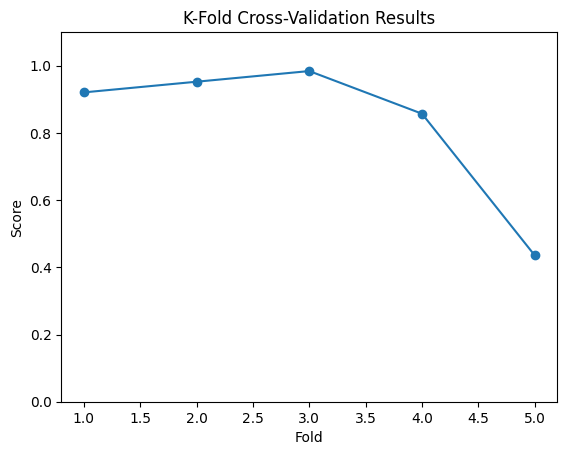

In [ ]:
# Perform k-fold cross-validation
scores = cross_val_score(rf, X, y, cv=5)
plt.plot(range(1, 6), scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.ylim([0, 1.1])
plt.title('K-Fold Cross-Validation Results')
plt.show()

SVM

In [ ]:
# Defining number of folds 
k = 10

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Create an instance of the SVM
s = svm.LinearSVC(max_iter=100000,random_state=42)
# Create empty lists to store the training and test scores
train_scores = []
test_scores = []

# Loop through each fold
for train_index, test_index in kf.split(X):
    # Split the data into training and test sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model on the training data
    s.fit(X_train, y_train)
    
    # Calculate the training and test scores for this fold
    train_score = s.score(X_train, y_train)
    test_score = s.score(X_test, y_test)
    
    # Append the scores to the respective lists
    train_scores.append(train_score)
    test_scores.append(test_score)

# Print the average training and test scores across all folds
print(f"Average training score: {np.mean(train_scores):.2f}")
print(f"Average test score: {np.mean(test_scores):.2f}")

Average training score: 0.94
Average test score: 0.94


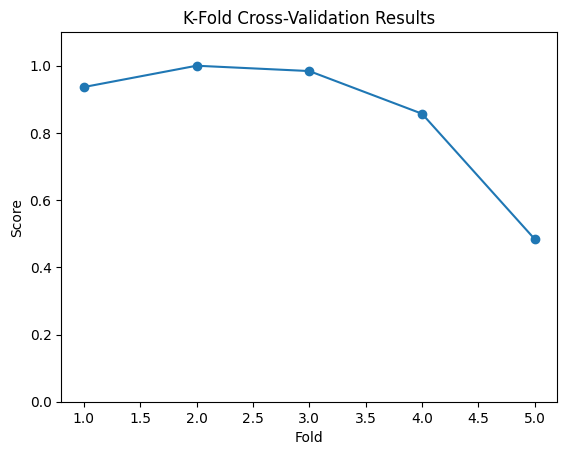

In [ ]:
# Define the model
s = svm.LinearSVC(max_iter=100000,random_state=42)

# Perform k-fold cross-validation
scores = cross_val_score(s, X, y, cv=5)

# Plot the results
plt.plot(range(1, 6), scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.ylim([0, 1.1])
plt.title('K-Fold Cross-Validation Results')
plt.show()